In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\canit\Downloads\renttherunway.csv")
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [4]:
df.shape

(192544, 16)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,192544.0,9.627150e+04,55582.809453,0.0,48135.75,96271.5,144407.25,192543.0
user_id,192544.0,4.994941e+05,289059.719328,9.0,250654.25,499419.0,750974.00,999997.0
item_id,192544.0,1.045684e+06,805314.802324,123373.0,195076.00,948396.0,1678888.00,2966087.0
rating,192462.0,9.092371e+00,1.430044,2.0,8.00,10.0,10.00,10.0
size,192544.0,1.224518e+01,8.494877,0.0,8.00,12.0,16.00,58.0
age,191584.0,3.387102e+01,8.058083,0.0,29.00,32.0,37.00,117.0


In [6]:
#Check if there are any duplicate records in the dataset? If any, drop them
len(df[df.duplicated()])

0

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(192544, 16)

In [9]:
#Drop the columns which you think redundant for the analysis. (Hint: drop columns like ‘id’, ‘review’) 
df.drop(columns=['user_id','review_text','review_summary'], inplace = True)
df.head(2)

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"


In [10]:
# Check the column 'weight', Is there any presence of string data? 
#If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)
df['weight'] = df['weight'].astype(str)
df['weight'] = df['weight'].str.replace('lbs', '').astype(float)
df.head(2)

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"


In [11]:
#Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. 
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [12]:
df['rented for']= df['rented for'].replace('party: cocktail','party')
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [13]:
import re
df['height'] = df['height'].astype(str)
#Function to convert height to inches using regex 
def height_to_inches(height): 
    match = re.search(r"(\d+)\D*(\d+)", height) 
    if match: 
        feet = int(match.group(1)) 
        inches = int(match.group(2)) 
        return feet * 12 + inches 
        return None
df['height'] = df['height'].apply(height_to_inches)

In [14]:
df.head(2)

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,"April 20, 2016"
1,1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,"June 18, 2013"


In [15]:
#Check for missing values in each column of the dfset? If it exists, impute them with appropriate methods.
#checking missing values
df.isnull().sum()

Unnamed: 0         0
fit                0
bust size      18411
item_id            0
weight         29982
rating            82
rented for        10
body type      14637
category           0
height           677
size               0
age              960
review_date        0
dtype: int64

In [16]:
# Impute missing values with median
df.fillna(df.mode(), inplace=True)
df.head(2)

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,"April 20, 2016"
1,1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,"June 18, 2013"


In [17]:
#Check the statistical summary for the numerical and categorical columns and write your findings
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,192544.0,9.627150e+04,55582.809453,0.0,48135.75,96271.5,144407.25,192543.0
item_id,192544.0,1.045684e+06,805314.802324,123373.0,195076.00,948396.0,1678888.00,2966087.0
weight,162562.0,1.373917e+02,21.899967,50.0,123.00,135.0,148.00,300.0
rating,192462.0,9.092371e+00,1.430044,2.0,8.00,10.0,10.00,10.0
height,191867.0,6.531062e+01,2.663480,54.0,63.00,65.0,67.00,78.0
size,192544.0,1.224518e+01,8.494877,0.0,8.00,12.0,16.00,58.0
age,191584.0,3.387102e+01,8.058083,0.0,29.00,32.0,37.00,117.0


In [18]:
df.describe(include=[object])

,fit,bust size,rented for,body type,category,review_date
count,192544,174133,192534,177907,192544,192544
unique,3,106,8,7,68,2274
top,fit,34b,wedding,hourglass,dress,"June 15, 2016"
freq,142058,27285,57784,55349,92884,844


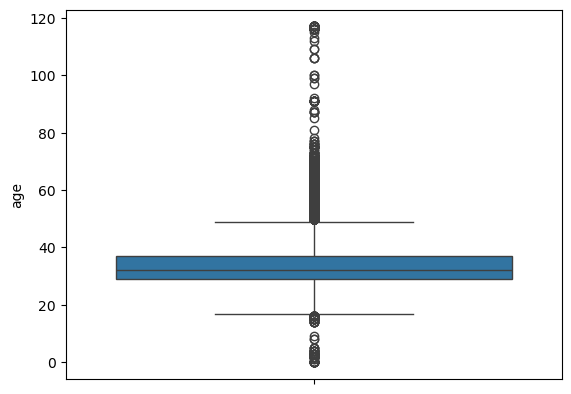

In [19]:
#Are there outliers present in the column age? If yes, treat them with the appropriate method.
# checking for outliers
sns.boxplot(df['age'])
plt.show()

In [20]:
# Treat outliers in 'age' using the IQR method
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['age'] = np.where((df['age'] < lower_bound) | (df['age'] > upper_bound), df['age'].median(), df['age'])

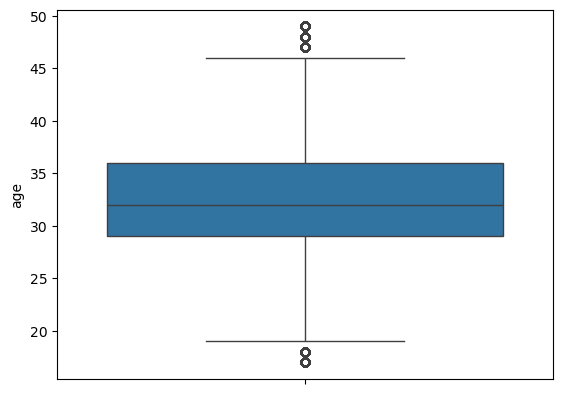

In [21]:
sns.boxplot(df['age'])
plt.show()

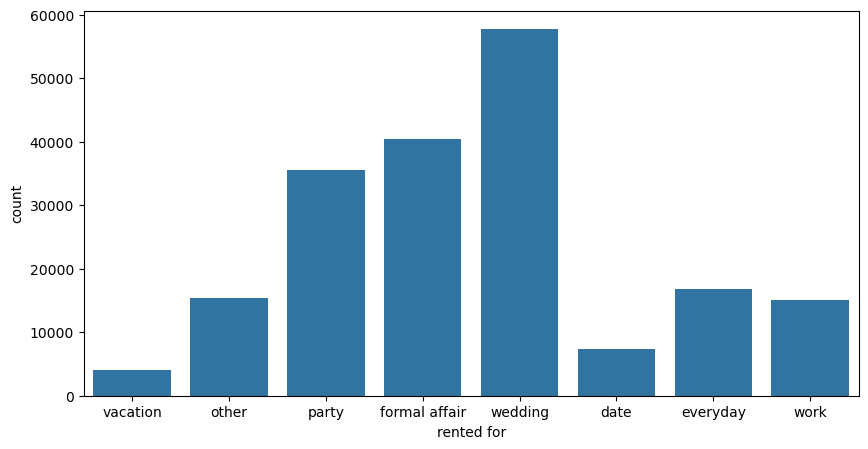

In [22]:
#Check the distribution of the different categories in the column 'rented for' using appropriate plot.
plt.figure(figsize = (10,5))
sns.countplot(x = 'rented for', data = df)
plt.show()

In [23]:
df.head(2)

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,"April 20, 2016"
1,1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,"June 18, 2013"


In [24]:
#Encode the categorical variables in the dataset
le = LabelEncoder()
categorical_columns = ['rented for', 'body type', 'category','fit','bust size', 'review_date']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [25]:
df.head(2)

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,0,39,2260466,137.0,10.0,5,3,44,68.0,14,28.0,77
1,1,0,37,153475,132.0,10.0,3,6,20,66.0,12,36.0,1189


In [26]:
df.fillna(df.mean(), inplace = True)
df.head()

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,0,0,39,2260466,137.000000,10.0,5,3,44,68.0,14,28.0,77
1,1,0,37,153475,132.000000,10.0,3,6,20,66.0,12,36.0,1189
2,2,0,106,1063761,137.391709,10.0,4,7,45,64.0,4,32.0,411
3,3,0,38,126335,135.000000,8.0,2,4,16,65.0,8,34.0,607
4,4,0,37,616682,145.000000,10.0,6,1,20,69.0,12,27.0,2205


In [27]:
# Standardize the df, so that the values are within a particular range
df1 = df.copy() 
scaled_features = StandardScaler().fit_transform(df1.values) 
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [28]:
scaled_features_df.head(3)

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,-1.732042,-0.556291,-0.295959,1.508460,-1.946601e-02,0.634822,0.514331,-0.142497,1.569310,1.011506,0.206575,-0.783464,-1.650564
1,-1.732024,-0.556291,-0.384988,-1.107903,-2.679414e-01,0.634822,-0.456769,1.434341,-0.307247,0.259283,-0.028862,0.570796,0.009280
2,-1.732006,-0.556291,2.686512,0.022448,-1.412419e-15,0.634822,0.028781,1.959954,1.647500,-0.492940,-0.970608,-0.106334,-1.152014


In [29]:
#Apply PCA on the above dfset and determine the number of PCA components to be used so that 90-95% of the variance in df is explained by the same
# Apply PCA
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00000519e+00, -3.01512080e-03,  1.74763375e-04,
        -2.69296026e-03,  4.27830883e-04, -2.80070287e-03,
        -1.77087079e-04,  1.97637599e-03, -1.67702322e-03,
         3.31966553e-03,  7.71673203e-04, -4.34045656e-05,
         8.18185027e-04],
       [-3.01512080e-03,  1.00000519e+00,  2.50158302e-03,
         2.36767713e-02,  1.34138344e-02, -2.45017128e-01,
         8.33218860e-03, -5.90412563e-03,  3.35892077e-04,
         1.56520435e-04,  6.54006939e-02, -1.09624416e-03,
        -6.37093934e-03],
       [ 1.74763375e-04,  2.50158302e-03,  1.00000519e+00,
        -2.00476710e-02,  3.05720522e-01, -2.22951935e-03,
         3.92707469e-03,  6.56867249e-02, -8.12084214e-03,
         8.50594386e-02,  3.69772205e-01,  5.71229144e-02,
        -7.13724329e-03],
       [-2.69296026e-03,  2.36767713e-02, -2.00476710e-02,
         1.00000519e+00, -3.24591786e-02, -1.16278922e-03,
        -6.25408886e-02,  3.20931759e-02,  3.01331416e-01,
         4.68120488e-03, -4.43115259e

In [30]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print(eig_vals)
print(eig_vectors)

[2.18870062 0.24912852 1.33904718 1.23802829 0.64088683 0.68429355
 0.75900094 0.83277309 0.90980267 1.00010887 1.0101241  1.08318969
 1.06498317]
[[-1.36122108e-03  1.02581561e-03  8.02881274e-03  1.42494019e-03
   9.62744397e-04  1.18909223e-04 -1.71122257e-02  2.04328555e-02
   1.90404156e-02 -9.97463691e-01 -6.16712219e-02 -3.87481649e-03
  -1.02286542e-02]
 [-4.94389769e-02  5.03127774e-02 -2.11217848e-01  6.58767194e-01
   9.24421902e-02  2.32212648e-01 -6.43367610e-01  4.44873807e-02
  -1.66927369e-02  2.20811745e-02 -1.77762094e-01 -7.00631924e-02
   2.81690865e-02]
 [-3.55968962e-01  6.39493799e-02  1.18493463e-02 -6.54929007e-02
   6.79249277e-01 -9.35140626e-02  6.33112123e-02  2.00523952e-01
  -6.16976637e-03  3.52146220e-03  8.37370740e-02 -5.31365074e-01
  -2.47008129e-01]
 [ 5.02494493e-02 -1.81399795e-02 -6.38131844e-01 -2.20842728e-01
  -4.34607935e-02 -6.61772187e-01 -2.36920231e-01 -8.10243648e-02
   8.68916156e-02  2.43563772e-03 -8.03166499e-02 -9.31228507e-02
   1

In [31]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[16.836071173649277, 10.300309418900579, 9.523245113581238, 8.332185107508106, 8.192135682933902, 7.770145014735978, 7.693105172508686, 6.998445705027885, 6.4059135756072845, 5.838438472205956, 5.263769217551575, 4.929873096554563, 1.9163632492349523]
[ 16.83607117  27.13638059  36.65962571  44.99181081  53.1839465
  60.95409151  68.64719668  75.64564239  82.05155596  87.88999444
  93.15376365  98.08363675 100.        ]


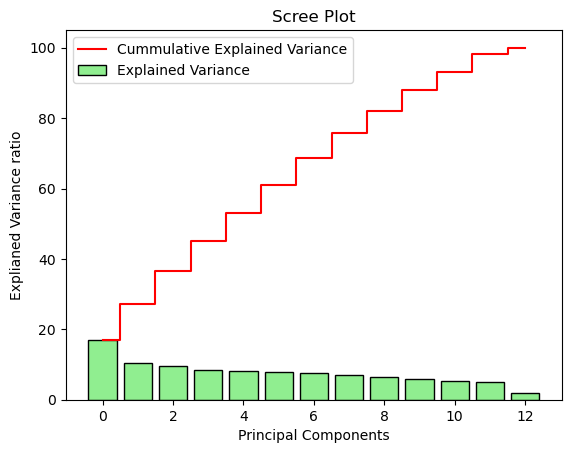

In [32]:
#Scree Plot
plt.bar(range(13),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance') 
plt.step(range(13),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance') 
plt.xlabel('Principal Components') 
plt.ylabel('Explianed Variance ratio') 
plt.title('Scree Plot') 
plt.legend(loc='best') 
plt.show()

In [33]:
pca = PCA(n_components = 8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns =['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8'])
pca_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.119259,1.575325,-1.491504,-0.584295,0.315752,1.184957,-1.81923,1.742368
1,-0.443700,-0.952695,-0.514433,0.392648,0.756745,-0.575602,-1.68197,-0.603376


In [34]:
#k-means clustering using PCA transformed data
cluster_errors = []
cluster_range = range (2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state = 100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

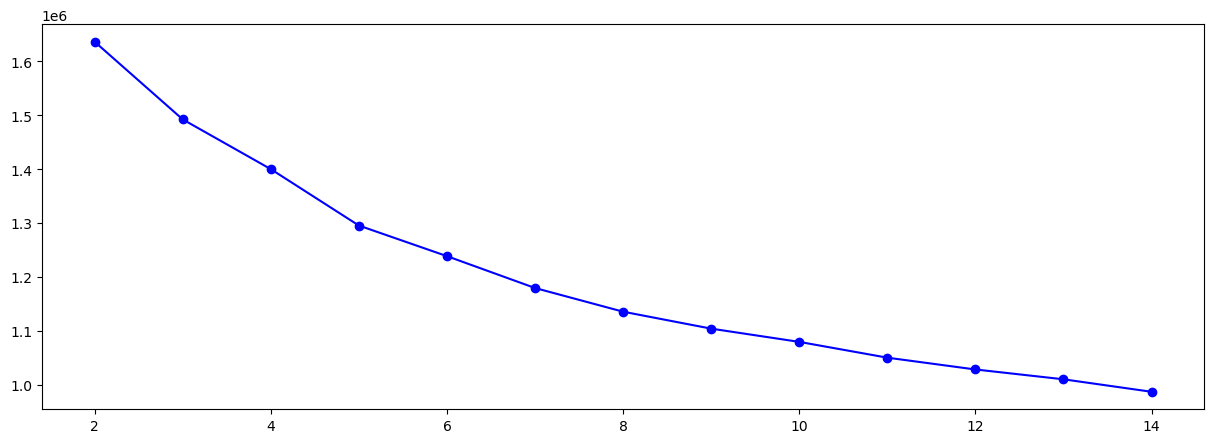

In [35]:
cluster_df = pd.DataFrame({'num_clusters': cluster_range, 'cluster_errors': cluster_errors})

plt.figure(figsize = [15,5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker ='o', color = 'b')
plt.show()

In [36]:
# Build K-means model with optimal K value (let's say K=3 for example)
Kmeans = KMeans(n_clusters = 3, random_state = 100)
Kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [37]:
label = pd.DataFrame(Kmeans.labels_, columns = ['Label'])

In [38]:
Kmeans_df = pca_df.join(label)
Kmeans_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,0.119259,1.575325,-1.491504,-0.584295,0.315752,1.184957,-1.819230,1.742368,0
1,-0.443700,-0.952695,-0.514433,0.392648,0.756745,-0.575602,-1.681970,-0.603376,1
2,-0.271990,0.785710,-1.303425,2.548405,1.891361,-0.117897,-1.761506,0.887031,0
3,-0.492126,-0.736531,0.515914,-0.632442,1.386235,-0.516499,-1.691115,-0.399479,1
4,0.618758,-1.231971,-0.728465,-0.726036,-2.064472,1.025812,-1.769044,-0.412303,2


In [39]:
Kmeans_df['Label'].value_counts()

Label
1    95191
2    62865
0    34488
Name: count, dtype: int64

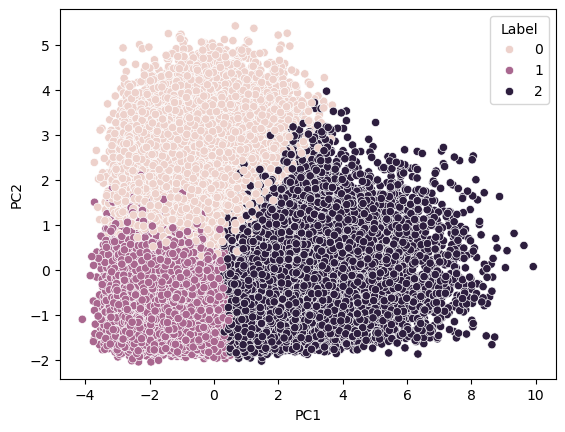

In [40]:
sns.scatterplot(data = Kmeans_df, hue= 'Label', x = 'PC1', y= 'PC2')
plt.show()

In [41]:
#Apply Agglomerative clustering and segment the data. 
#Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. 

In [42]:
subset_indices = np.random.choice(len(scaled_features), size=1000, replace=False)
subset = scaled_features[subset_indices]

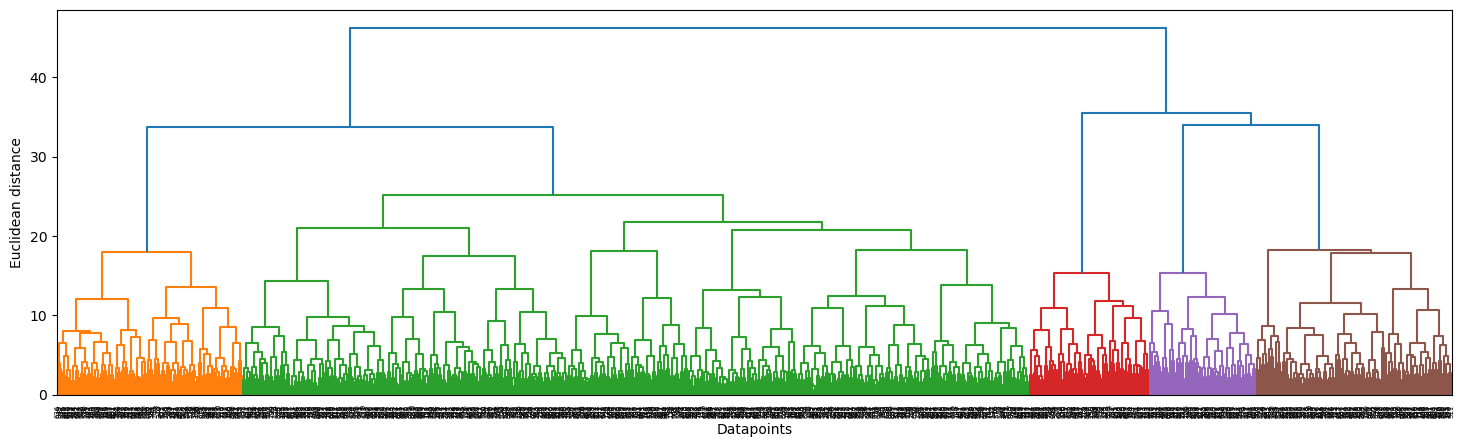

In [43]:
plt.figure(figsize=[18,5])
merg = linkage(subset, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [44]:
for i in range (2,15):
    hier = AgglomerativeClustering(n_clusters = i)
    hier = hier.fit(subset)
    labels = hier.fit_predict(subset)
    print(i, silhouette_score(subset, labels))

2 0.12529121114483785
3 0.13123138168245582
4 0.12444804302584561
5 0.1000541503275152
6 0.06248716619091026
7 0.05781379976749467
8 0.04761059990276644
9 0.04319970816076187
10 0.0451459708850961
11 0.040933679960472216
12 0.04158436597420146
13 0.045528869729116024
14 0.04923003734065236


In [45]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(subset)

In [46]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,1
2,1
3,1
4,2


In [47]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc) 
dfc = df.copy()
df_hier = dfc.join(df_label1)
df_hier.head()

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date,Labels
0,0,0,39,2260466,137.000000,10.0,5,3,44,68.0,14,28.0,77,1.0
1,1,0,37,153475,132.000000,10.0,3,6,20,66.0,12,36.0,1189,1.0
2,2,0,106,1063761,137.391709,10.0,4,7,45,64.0,4,32.0,411,1.0
3,3,0,38,126335,135.000000,8.0,2,4,16,65.0,8,34.0,607,1.0
4,4,0,37,616682,145.000000,10.0,6,1,20,69.0,12,27.0,2205,2.0


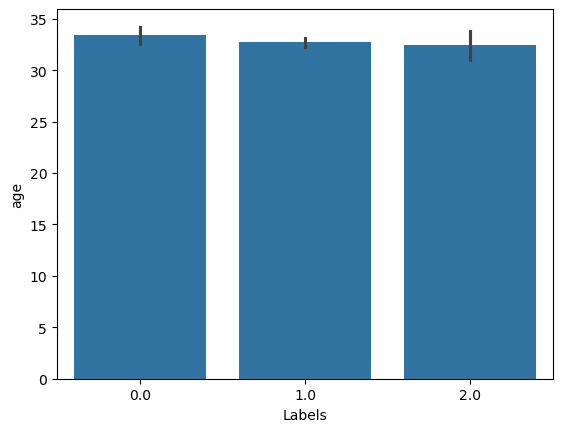

In [48]:
sns.barplot(x=df_hier['Labels'], y=df_hier['age']) 
plt.show()

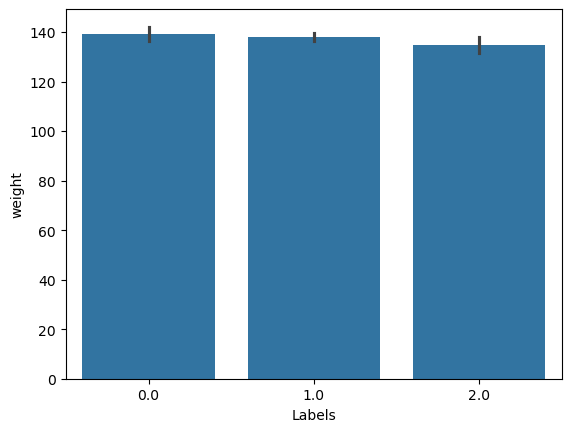

In [49]:
sns.barplot(x=df_hier['Labels'], y=df_hier['weight']) 
plt.show()

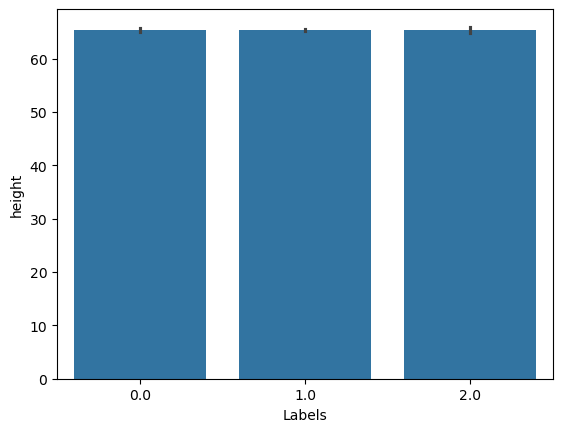

In [50]:
sns.barplot(x=df_hier['Labels'], y=df_hier['height']) 
plt.show()